In [36]:
import os
import numpy as np
import librosa
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump, load


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def extract_features_from_file(file_path):

    df = pd.read_csv(file_path, header=None)
    df = df.iloc[1:].transpose()  
    
    features = []
    for column in df.columns:
        coefficient_data = df[column]
        

        coefficient_data = coefficient_data.fillna(0)
        

        features.extend([
            coefficient_data.mean(),
            coefficient_data.std(),
            np.percentile(coefficient_data, 25),
            coefficient_data.median(),
            np.percentile(coefficient_data, 75),
            coefficient_data.max(),
            coefficient_data.min(),
            stats.kurtosis(coefficient_data),
            stats.skew(coefficient_data),
            stats.entropy(coefficient_data.value_counts(normalize=True)),  # Entropy
            np.sqrt(np.mean(coefficient_data**2)),  # Root Mean Square
        ])
        
    
    print(f"Feature extraction and scaling of {file_path} done")
    return features


In [ ]:
def load_and_preprocess_data(directory_path):
    data = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                features = extract_features_from_file(file_path)
                data.append(features)
                labels.append(label)
                
    data = np.array(data)

    print("Shape of dataset after feature extraction:", data.shape)

    return data, labels
data,labels =load_and_preprocess_data('Mfcc_training datset')

Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aage Bhi Jaane Na - Waqt (1965) 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaiye Meharban - Howrah Bridge 1958 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Ki Raat Koi Aane Ko Hai - Anamika 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Koi Pyar Se - Sawan Ki Ghata 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaj Qayamat Ho Gai - Qayamat 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aaja Aaja Sanam Rakhi Aur Hathkadi 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aao Huzoor Tumko - Kismet 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training datset\Asha Bhosle\Aao Na Gale Lag Jao Na - Mere Jeevan Saathi 320 Kbps.csv done
Feature extraction and scaling of Mfcc_training

In [39]:
labels= np.array(labels)
labels.shape

(608,)

In [ ]:
data.shape

(608, 220)

In [41]:
X_train, y_train = data.copy(),labels.copy()

In [ ]:

y_train = y_train[:608].reshape(-1, 1) 

x_y = np.hstack((X_train, y_train))

print(x_y)
np.random.shuffle(x_y)
x_y

[['-226.64940455561606' '56.37847587941111' '-249.60046' ...
  '10.523714602329814' '13.037416191557192' 'Asha Bhosle']
 ['-257.1164477907458' '63.58023530047273' '-275.218085' ...
  '9.90785253077827' '11.263734404173974' 'Asha Bhosle']
 ['-187.594066481613' '65.85296547796375' '-216.21999' ...
  '10.393451272115513' '8.80609286233409' 'Asha Bhosle']
 ...
 ['-226.1612263141829' '82.94257393947727' '-282.624735' ...
  '10.797861301392961' '7.198165978845693' 'Micheal Jackson']
 ['-104.9362742494978' '96.48779625540874' '-153.41112' ...
  '9.896115565227646' '8.089545589732445' 'Micheal Jackson']
 ['-145.75648380574646' '64.8254453753468' '-187.56892' ...
  '10.323260719657414' '7.5922995798794615' 'Micheal Jackson']]


array([['-197.83104771881986', '70.60243760638839',
        '-218.29047500000001', ..., '8.81067696831582',
        '10.037605897964598', 'Jana Gana Mana'],
       ['-87.33425308052287', '70.57619646938392', '-118.287015', ...,
        '9.974074446014365', '9.869479087404894', 'Micheal Jackson'],
       ['-210.48090724917392', '87.65605468324401', '-241.44257', ...,
        '8.945764653162334', '10.995697867441484', 'Jana Gana Mana'],
       ...,
       ['-199.11380350646075', '62.20682468617571', '-236.968765', ...,
        '10.444466879252202', '10.592562509265242', 'Bhaav Geet'],
       ['-322.5901208733553', '54.140288178269344', '-347.5138', ...,
        '9.739782822707191', '13.603492328579264', 'Lavni'],
       ['-199.88108208932678', '92.14870498360267', '-257.18363', ...,
        '10.76060477598342', '7.425152119084295', 'Micheal Jackson']],
      dtype='<U32')

In [ ]:
X_train = x_y[:, :-1]  
y_train = x_y[:, -1]
label_map = {
    'Asha Bhosle': 0,
    'Bhaav Geet': 1,
    'Jana Gana Mana': 2,
    'Kishore kumar': 3,
    'Lavni': 4,
    'Micheal Jackson': 5

}


y_train = [label for label in y_train]  

mapped_labels = []
for label in y_train:
    if label in label_map:
        mapped_labels.append(label_map[label])
    else:
        print(f"Warning: Label '{label}' not found in label_map. Assigning default value.")
        mapped_labels.append(0)  

y_train = np.array(mapped_labels)



In [44]:
print(y_train.shape)
X_train

(608,)


array([['-197.83104771881986', '70.60243760638839',
        '-218.29047500000001', ..., '0.11430064037501173',
        '8.81067696831582', '10.037605897964598'],
       ['-87.33425308052287', '70.57619646938392', '-118.287015', ...,
        '0.5043889431497383', '9.974074446014365', '9.869479087404894'],
       ['-210.48090724917392', '87.65605468324401', '-241.44257', ...,
        '-0.22607543333475077', '8.945764653162334',
        '10.995697867441484'],
       ...,
       ['-199.11380350646075', '62.20682468617571', '-236.968765', ...,
        '1.1039048260080877', '10.444466879252202', '10.592562509265242'],
       ['-322.5901208733553', '54.140288178269344', '-347.5138', ...,
        '0.3953797880367182', '9.739782822707191', '13.603492328579264'],
       ['-199.88108208932678', '92.14870498360267', '-257.18363', ...,
        '0.21313592348090282', '10.76060477598342', '7.425152119084295']],
      dtype='<U32')

In [45]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.2, random_state=2)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

C_values = [0.1, 1, 10]
gamma_values = ['scale', 0.01, 0.1]
kernels = ['linear', 'rbf', 'poly']

results = []

for C in C_values:
    for gamma in gamma_values:
        for kernel in kernels:
            svm_model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
            svm_model.fit(X_train_s, y_train_s)
            
            y_pred = svm_model.predict(X_test_s)
            
            accuracy = accuracy_score(y_test_s, y_pred)
            precision = precision_score(y_test_s, y_pred, average='weighted')
            recall = recall_score(y_test_s, y_pred, average='weighted')
            f1 = f1_score(y_test_s, y_pred, average='weighted')
            
            results.append({
                'C': C,
                'gamma': gamma,
                'kernel': kernel,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })

results_df = pd.DataFrame(results)


print("Model performance for different hyperparameters:")
print(results_df.sort_values(by='accuracy', ascending=False))



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Model performance for different hyperparameters:
       C  gamma  kernel  accuracy  precision    recall  f1_score
26  10.0    0.1    poly  0.778689   0.787709  0.778689  0.779853
23  10.0   0.01    poly  0.778689   0.787709  0.778689  0.779853
5    0.1   0.01    poly  0.778689   0.787709  0.778689  0.779853
17   1.0    0.1    poly  0.778689   0.787709  0.778689  0.779853
8    0.1    0.1    poly  0.778689   0.787709  0.778689  0.779853
14   1.0   0.01    poly  0.778689   0.787709  0.778689  0.779853
12   1.0   0.01  linear  0.770492   0.790553  0.770492  0.774505
24  10.0    0.1  linear  0.770492   0.790553  0.770492  0.774505
21  10.0   0.01  linear  0.770492   0.790553  0.770492  0.774505
18  10.0  scale  linear  0.770492   0.790553  0.770492  0.774505
15   1.0    0.1  linear  0.770492   0.790553  0.770492  0.774505
0    0.1  scale  linear  0.770492   0.790553  0.770492  0.774505
9    1.0  scale  linear  0.770492   0.790553  0.770492  0.774505
6    0.1    0.1  linear  0.770492   0.790

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
best_model_params = results_df.sort_values(by='accuracy', ascending=False).iloc[0]
best_C = best_model_params['C']
best_gamma = best_model_params['gamma']
best_kernel = best_model_params['kernel']

print(f"Best Model - C: {best_C}, gamma: {best_gamma}, kernel: {best_kernel}")

Best Model - C: 10.0, gamma: 0.1, kernel: poly


In [48]:
best_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel, probability=True)

In [49]:
best_svm_model.fit(X_train_s, y_train_s)


SVC(C=10.0, gamma=0.1, kernel='poly', probability=True)

In [50]:
directory_path = "MFCC-files-v2-20241027"

In [ ]:
def extract_features_from_file_test(file_path):
    df = pd.read_csv(file_path, header=None)
    df = df.transpose()  

    features = []
    for column in df.columns:
        coefficient_data = df[column]
        
       
        coefficient_data = coefficient_data.fillna(0)
        
       
        features.extend([
            coefficient_data.mean(),
            coefficient_data.std(),
            np.percentile(coefficient_data, 25),
            coefficient_data.median(),
            np.percentile(coefficient_data, 75),
            coefficient_data.max(),
            coefficient_data.min(),
            stats.kurtosis(coefficient_data),
            stats.skew(coefficient_data),
            stats.entropy(coefficient_data.value_counts(normalize=True)),  # Entropy
            np.sqrt(np.mean(coefficient_data**2)),  # Root Mean Square
            
        ])
        

    
    print(f"Feature extraction and scaling of {file_path} done")
    return features


In [ ]:
X_new_all = []

prediction_results = []
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        X_new = extract_features_from_file_test(file_path)
        X_new_all.append(X_new) 

        y_pred = best_svm_model.predict([X_new]) 
        y_pred_prob = best_svm_model.predict_proba([X_new]) 
        for idx in range(len(y_pred)):
            result_dict = {
                'Filename': filename,
                'Predicted_Label': y_pred[idx],
                'Probabilities': y_pred_prob[idx]  
            }
            prediction_results.append(result_dict)
predictions_df = pd.DataFrame(prediction_results)

predictions_df

Feature extraction and scaling of MFCC-files-v2-20241027\01-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\02-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\03-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\04-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\05-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\06-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\07-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\08-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\09-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\10-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\100-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\101-MFCC.csv done
Feature extraction and scaling of MFCC-files-v2-20241027\102-MFCC.csv done
Feature extraction and scaling of M

,Filename,Predicted_Label,Probabilities
0,01-MFCC.csv,2,"[0.0864656611685492, 0.07174937895345629, 0.38..."
1,02-MFCC.csv,2,"[0.007948640031712665, 0.0045777308750499296, ..."
2,03-MFCC.csv,5,"[0.017461065738578623, 0.015223648042987821, 0..."
3,04-MFCC.csv,4,"[0.34840110769320853, 0.0285754603903909, 0.04..."
4,05-MFCC.csv,3,"[0.02492774867350828, 0.04616461032273601, 0.0..."
...,...,...,...
111,95-MFCC.csv,4,"[0.24663298372696882, 0.018504593519777544, 0...."
112,96-MFCC.csv,3,"[0.36659209721214714, 0.08032143729723046, 0.0..."
113,97-MFCC.csv,3,"[0.05492260084862037, 0.03944473198684227, 0.0..."
114,98-MFCC.csv,1,"[0.01981518167742911, 0.6055012350973249, 0.12..."


In [53]:
predictions_df

,Filename,Predicted_Label,Probabilities
0,01-MFCC.csv,2,"[0.0864656611685492, 0.07174937895345629, 0.38..."
1,02-MFCC.csv,2,"[0.007948640031712665, 0.0045777308750499296, ..."
2,03-MFCC.csv,5,"[0.017461065738578623, 0.015223648042987821, 0..."
3,04-MFCC.csv,4,"[0.34840110769320853, 0.0285754603903909, 0.04..."
4,05-MFCC.csv,3,"[0.02492774867350828, 0.04616461032273601, 0.0..."
...,...,...,...
111,95-MFCC.csv,4,"[0.24663298372696882, 0.018504593519777544, 0...."
112,96-MFCC.csv,3,"[0.36659209721214714, 0.08032143729723046, 0.0..."
113,97-MFCC.csv,3,"[0.05492260084862037, 0.03944473198684227, 0.0..."
114,98-MFCC.csv,1,"[0.01981518167742911, 0.6055012350973249, 0.12..."


In [54]:
reverse_label_map = {v: k for k, v in label_map.items()}

In [55]:
predictions_df['Predicted_Label_String'] = predictions_df['Predicted_Label'].map(reverse_label_map)

In [56]:
predictions_df

,Filename,Predicted_Label,Probabilities,Predicted_Label_String
0,01-MFCC.csv,2,"[0.0864656611685492, 0.07174937895345629, 0.38...",Jana Gana Mana
1,02-MFCC.csv,2,"[0.007948640031712665, 0.0045777308750499296, ...",Jana Gana Mana
2,03-MFCC.csv,5,"[0.017461065738578623, 0.015223648042987821, 0...",Micheal Jackson
3,04-MFCC.csv,4,"[0.34840110769320853, 0.0285754603903909, 0.04...",Lavni
4,05-MFCC.csv,3,"[0.02492774867350828, 0.04616461032273601, 0.0...",Kishore kumar
...,...,...,...,...
111,95-MFCC.csv,4,"[0.24663298372696882, 0.018504593519777544, 0....",Lavni
112,96-MFCC.csv,3,"[0.36659209721214714, 0.08032143729723046, 0.0...",Kishore kumar
113,97-MFCC.csv,3,"[0.05492260084862037, 0.03944473198684227, 0.0...",Kishore kumar
114,98-MFCC.csv,1,"[0.01981518167742911, 0.6055012350973249, 0.12...",Bhaav Geet


In [57]:
# Assuming predictions_df already has the 'Predicted_Label_String' and 'Probabilities' columns
for idx, row in predictions_df.iterrows():
    filename = row['Filename']
    predicted_label = row['Predicted_Label_String']
    probabilities = row['Probabilities']
    
    # Print the results in the desired format
    print(f"{filename}: Predicted Label - {predicted_label}, Probabilities - {probabilities}")


01-MFCC.csv: Predicted Label - Jana Gana Mana, Probabilities - [0.08646566 0.07174938 0.3886532  0.1149944  0.2857517  0.05238566]
02-MFCC.csv: Predicted Label - Jana Gana Mana, Probabilities - [0.00794864 0.00457773 0.96140579 0.00914042 0.01087695 0.00605047]
03-MFCC.csv: Predicted Label - Micheal Jackson, Probabilities - [0.01746107 0.01522365 0.00847614 0.04867561 0.06094124 0.8492223 ]
04-MFCC.csv: Predicted Label - Lavni, Probabilities - [0.34840111 0.02857546 0.04794853 0.01843521 0.54795556 0.00868413]
05-MFCC.csv: Predicted Label - Kishore kumar, Probabilities - [0.02492775 0.04616461 0.00586752 0.91380934 0.00615528 0.0030755 ]
06-MFCC.csv: Predicted Label - Asha Bhosle, Probabilities - [0.54714756 0.06489368 0.02821303 0.01854673 0.33326621 0.0079328 ]
07-MFCC.csv: Predicted Label - Asha Bhosle, Probabilities - [0.25699612 0.1386233  0.05280814 0.23615421 0.27149006 0.04392817]
08-MFCC.csv: Predicted Label - Micheal Jackson, Probabilities - [0.06102877 0.01936579 0.0400791  

In [ ]:
label_results = {}

for result in prediction_results:
    filename = result['Filename']
    predicted_label = result['Predicted_Label']
    probability = result['Probabilities'].max()  
    
    label_name = [key for key, value in label_map.items() if value == predicted_label][0]
    
    if label_name not in label_results:
        label_results[label_name] = []
    
    label_results[label_name].append((filename, probability))


label_results


{'Jana Gana Mana': [('01-MFCC.csv', 0.3886532007342989),
  ('02-MFCC.csv', 0.9614057886433138),
  ('107-MFCC.csv', 0.5515042172063186),
  ('108-MFCC.csv', 0.41545241534840666),
  ('16-MFCC.csv', 0.9960620763874346),
  ('17-MFCC.csv', 0.5089610495001441),
  ('31-MFCC.csv', 0.8734337890372145),
  ('61-MFCC.csv', 0.7187551924893052),
  ('74-MFCC.csv', 0.39432930128487553),
  ('75-MFCC.csv', 0.9975599284278962),
  ('87-MFCC.csv', 0.6538645980639911),
  ('90-MFCC.csv', 0.9555160934715327)],
 'Micheal Jackson': [('03-MFCC.csv', 0.8492222992275803),
  ('08-MFCC.csv', 0.6270975422758907),
  ('103-MFCC.csv', 0.8652860445968641),
  ('114-MFCC.csv', 0.9391168212347797),
  ('20-MFCC.csv', 0.9605310788539073),
  ('34-MFCC.csv', 0.6639393787684366),
  ('44-MFCC.csv', 0.8365760513276651),
  ('45-MFCC.csv', 0.8838555007866544),
  ('53-MFCC.csv', 0.5997573486270066),
  ('78-MFCC.csv', 0.6407283142359357),
  ('86-MFCC.csv', 0.8308075227888149)],
 'Lavni': [('04-MFCC.csv', 0.5479555620027183),
  ('105-MF

In [59]:
for label in label_results:
    label_results[label] = sorted(label_results[label], key=lambda x: x[1], reverse=True)[:5]

In [60]:
label_results

{'Jana Gana Mana': [('75-MFCC.csv', 0.9975599284278962),
  ('16-MFCC.csv', 0.9960620763874346),
  ('02-MFCC.csv', 0.9614057886433138),
  ('90-MFCC.csv', 0.9555160934715327),
  ('31-MFCC.csv', 0.8734337890372145)],
 'Micheal Jackson': [('20-MFCC.csv', 0.9605310788539073),
  ('114-MFCC.csv', 0.9391168212347797),
  ('45-MFCC.csv', 0.8838555007866544),
  ('103-MFCC.csv', 0.8652860445968641),
  ('03-MFCC.csv', 0.8492222992275803)],
 'Lavni': [('52-MFCC.csv', 0.856581834835359),
  ('73-MFCC.csv', 0.6983050821285833),
  ('25-MFCC.csv', 0.6735193173583406),
  ('105-MFCC.csv', 0.6503027933932829),
  ('95-MFCC.csv', 0.6434455825559442)],
 'Kishore kumar': [('09-MFCC.csv', 0.9840688761908827),
  ('100-MFCC.csv', 0.9661109357249893),
  ('84-MFCC.csv', 0.9597478926908825),
  ('29-MFCC.csv', 0.9402033881495175),
  ('51-MFCC.csv', 0.9373428103658352)],
 'Asha Bhosle': [('79-MFCC.csv', 0.8804546873298255),
  ('110-MFCC.csv', 0.879239563093643),
  ('80-MFCC.csv', 0.8692692003920625),
  ('39-MFCC.csv', 

In [61]:
for label, files in label_results.items():
    print(f"Top 5 MFCC files with the highest probability for label '{label}':")
    for file_name, prob in files:
        print(f"  {file_name}: Probability = {prob}")
    print("\n")

Top 5 MFCC files with the highest probability for label 'Jana Gana Mana':
  75-MFCC.csv: Probability = 0.9975599284278962
  16-MFCC.csv: Probability = 0.9960620763874346
  02-MFCC.csv: Probability = 0.9614057886433138
  90-MFCC.csv: Probability = 0.9555160934715327
  31-MFCC.csv: Probability = 0.8734337890372145


Top 5 MFCC files with the highest probability for label 'Micheal Jackson':
  20-MFCC.csv: Probability = 0.9605310788539073
  114-MFCC.csv: Probability = 0.9391168212347797
  45-MFCC.csv: Probability = 0.8838555007866544
  103-MFCC.csv: Probability = 0.8652860445968641
  03-MFCC.csv: Probability = 0.8492222992275803


Top 5 MFCC files with the highest probability for label 'Lavni':
  52-MFCC.csv: Probability = 0.856581834835359
  73-MFCC.csv: Probability = 0.6983050821285833
  25-MFCC.csv: Probability = 0.6735193173583406
  105-MFCC.csv: Probability = 0.6503027933932829
  95-MFCC.csv: Probability = 0.6434455825559442


Top 5 MFCC files with the highest probability for label 'K

In [62]:
predictions_df['File_Number'] = predictions_df['Filename'].str.extract(r'(\d+)', expand=False).astype(int)
predictions_df

,Filename,Predicted_Label,Probabilities,Predicted_Label_String,File_Number
0,01-MFCC.csv,2,"[0.0864656611685492, 0.07174937895345629, 0.38...",Jana Gana Mana,1
1,02-MFCC.csv,2,"[0.007948640031712665, 0.0045777308750499296, ...",Jana Gana Mana,2
2,03-MFCC.csv,5,"[0.017461065738578623, 0.015223648042987821, 0...",Micheal Jackson,3
3,04-MFCC.csv,4,"[0.34840110769320853, 0.0285754603903909, 0.04...",Lavni,4
4,05-MFCC.csv,3,"[0.02492774867350828, 0.04616461032273601, 0.0...",Kishore kumar,5
...,...,...,...,...,...
111,95-MFCC.csv,4,"[0.24663298372696882, 0.018504593519777544, 0....",Lavni,95
112,96-MFCC.csv,3,"[0.36659209721214714, 0.08032143729723046, 0.0...",Kishore kumar,96
113,97-MFCC.csv,3,"[0.05492260084862037, 0.03944473198684227, 0.0...",Kishore kumar,97
114,98-MFCC.csv,1,"[0.01981518167742911, 0.6055012350973249, 0.12...",Bhaav Geet,98


In [63]:
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

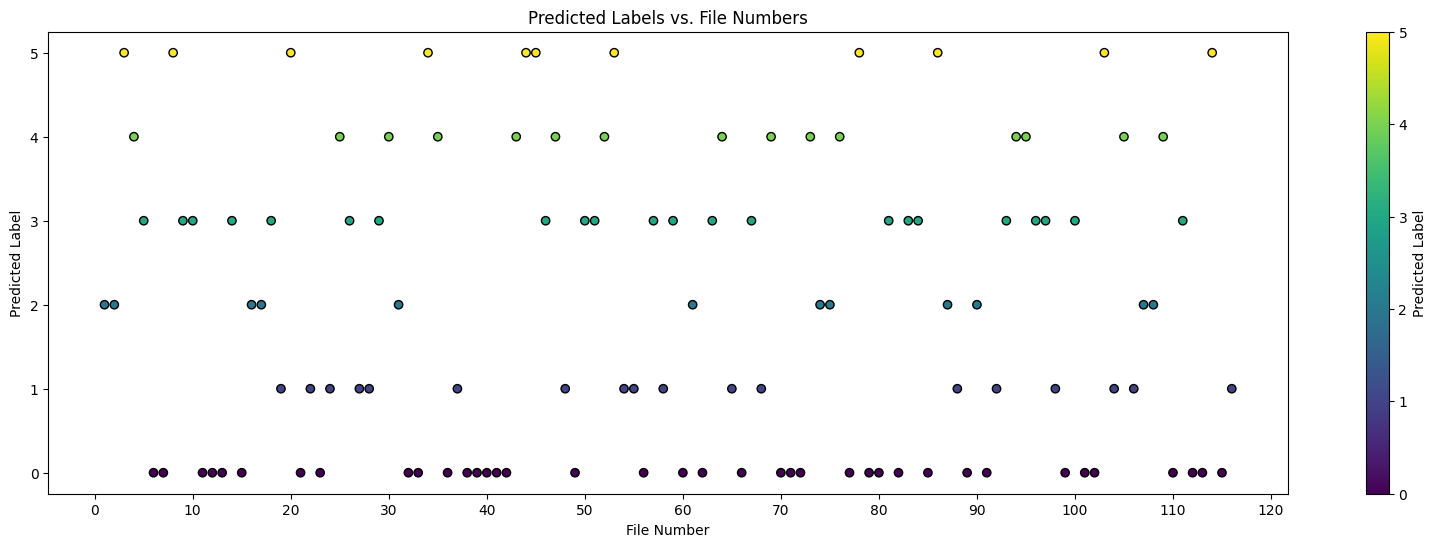

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(predictions_df['File_Number'], predictions_df['Predicted_Label'], 
            c=predictions_df['Predicted_Label'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("File Number")
plt.ylabel("Predicted Label")
plt.title("Predicted Labels vs. File Numbers")
plt.colorbar(label="Predicted Label")

plt.xticks(predictions_df['File_Number'].unique())
plt.xticks(range(0, predictions_df['File_Number'].max() + 10, 10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

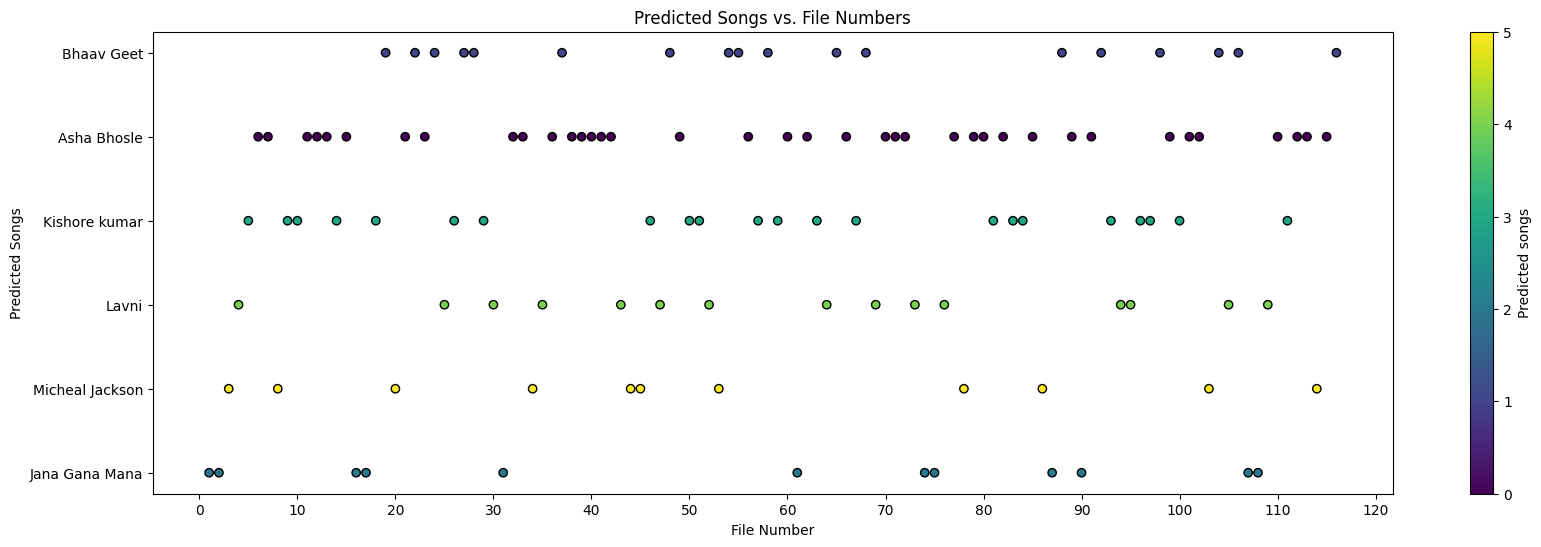

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(predictions_df['File_Number'], predictions_df['Predicted_Label_String'], 
            c=predictions_df['Predicted_Label'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("File Number")
plt.ylabel("Predicted Songs")
plt.title("Predicted Songs vs. File Numbers")
plt.colorbar(label="Predicted songs")

plt.xticks(predictions_df['File_Number'].unique())
plt.xticks(range(0, predictions_df['File_Number'].max() + 10, 10))
plt.show